# Uvod #

U prve dvije lekcije naučili smo kako izgraditi potpuno povezane mreže od gomile gustih slojeva. Prilikom prve izrade, sve težine mreže postavljene su nasumično -- mreža još ništa ne "zna". U ovoj lekciji ćemo vidjeti kako trenirati neuronsku mrežu; vidjet ćemo kako neuronske mreže *uče*.

Kao i kod svih zadataka strojnog učenja, počinjemo sa skupom podataka za obuku. Svaki primjer u podacima o obuci sastoji se od nekih značajki (ulaza) zajedno s očekivanim ciljem (izlaz). Uvježbavanje mreže znači podešavanje njezinih težina na takav način da može transformirati značajke u cilj. U skupu podataka *80 žitarica*, na primjer, želimo mrežu koja može uzeti sadržaj `'sugars'`, `'fibers'` i `'proteins'` svake žitarice i proizvesti predviđanje `'calories'` te žitarice. Ako možemo uspješno uvježbati mrežu da to čini, njezine težine moraju na neki način predstavljati odnos između tih značajki i tog cilja kako je izraženo u podacima o uvježbavanju.

Osim podataka za treniranje, potrebne su nam još dvije stvari:
- "Funkcija gubitka" koja mjeri koliko su dobra predviđanja mreže.
- "Optimizator" koji može reći mreži kako promijeniti svoje težine.

# Funkcija gubitka #

Vidjeli smo kako dizajnirati arhitekturu za mrežu, ali nismo vidjeli kako mreži reći *koji* problem treba riješiti. Ovo je posao funkcije gubitka.

**Funkcija gubitka** mjeri disparitet između prave vrijednosti cilja i vrijednosti koju model predviđa.

Različiti problemi zahtijevaju različite funkcije gubitaka. Gledali smo **regresijske** probleme, gdje je zadatak predvidjeti neku brojčanu vrijednost -- kalorije u *80 žitarica*, ocjena u *Red wine quality*. Drugi zadaci regresije mogu biti predviđanje cijene kuće ili učinkovitosti goriva automobila.

Uobičajena funkcija gubitka za regresijske probleme je **srednja apsolutna pogreška** ili **MAE**. Za svako predviđanje "y_pred", MAE mjeri odstupanje od pravog cilja "y_true" apsolutnom razlikom "abs(y_true - y_pred)".

Ukupni MAE gubitak na skupu podataka srednja je vrijednost svih ovih apsolutnih razlika.

<figure style="padding: 1em;">
<img src="figs/VDcvkZN.png" width="500" alt="A graph depicting error bars from data points to the fitted line..">
<figcaption style="textalign: center; font-style: italic"><center>Srednja apsolutna pogreška prosječna je duljina između prilagođene krivulje i podatkovnih točaka.
</center></figcaption>
</figure>

Osim MAE, druge funkcije gubitka koje možete vidjeti za regresijske probleme su srednje kvadratna pogreška (MSE) ili Huberov gubitak (obje dostupne u Kerasu).

Tijekom treninga, model će koristiti funkciju gubitka kao vodič za pronalaženje točnih vrijednosti svojih težina (manji gubitak je bolji). Drugim riječima, funkcija gubitka govori mreži njezin cilj.

# Optimizator - Stohastički gradijentni pad #

Opisali smo problem koji želimo da mreža riješi, ali sada moramo reći *kako* ga riješiti. Ovo je posao **optimizatora**. Optimizator je algoritam koji prilagođava težine kako bi se smanjio gubitak.

Gotovo svi algoritmi optimizacije koji se koriste u dubokom učenju pripadaju obitelji koja se naziva **stohastičko gradijentno spuštanje - stohastic gradient descend - SGD**. To su iterativni algoritmi koji treniraju mrežu u koracima. Jedan **korak** treninga ide ovako:
1. Uzmite uzorke podataka o treniranju i provucite ih kroz mrežu ih da napravite predviđanja.
2. Izmjerite gubitak između predviđanja i pravih vrijednosti.
3. Na kraju, namjestite težine u smjeru koji smanjuje gubitak.

Zatim samo radite ovo iznova i iznova dok gubitak ne bude onoliko mali koliko želite (ili dok se više ne smanji).

<figure style="padding: 1em;">
<img src="figs/rFI1tIk.gif" width="1600" alt="Fitting a line batch by batch. The loss decreases and the weights approach their true values.">
<figcaption style="textalign: center; font-style: italic"><center>Treniranje neuronske mreže sa Stohastičkim gradijentnim spuštanjem - SGD.
</center></figcaption>
</figure>

Uzorak podataka za obuku svake iteracije naziva se **minibatch** (ili često samo "serija"), dok se kompletan krug podataka za obuku naziva **epoha**. Broj epoha za koje trenirate je koliko će puta mreža vidjeti svaki primjer prilikom treniranja.

Animacija prikazuje linearni model koji se trenira sa SGD. Blijedocrvene točke prikazuju cijeli set za treniranje, dok su pune crvene točke miniserije. Svaki put kada SGD vidi novu miniseriju, pomaknut će težine (`w` nagib i `b` y-odsječak) prema njihovim točnim vrijednostima na toj seriji. Serija za serijom, linija na kraju konvergira kako bi najbolje pristajala. Možete vidjeti da gubitak postaje manji kako se težine približavaju svojim pravim vrijednostima.

## Stopa učenja i veličina serije ##

Primijetite da se linija samo malo pomiče u smjeru svake serije (umjesto da se pomakne do kraja). Veličina tih pomaka određena je **stopom učenja**. Manja stopa učenja znači da mreža mora vidjeti više miniserija prije nego što njezine težine konvergiraju svojim najboljim vrijednostima.

Stopa učenja i veličina miniserija dva su parametra koji imaju najveći učinak prilikom SGD traniranja. Njihova je interakcija često suptilna i pravi izbor za te parametre nije uvijek očit. (Istražit ćemo ove učinke u vježbi.)

Srećom, za većinu poslova neće biti potrebno napraviti opsežno pretraživanje hiperparametara da bi se dobili zadovoljavajući rezultati. **Adam** je SGD algoritam koji ima prilagodljivu stopu učenja koja ga čini prikladnim za većinu problema bez ikakvog podešavanja parametara (to je "samopodešavanje", u određenom smislu). Adam je izvrstan optimizator opće namjene.

## Dodavanje Gubitka i Optimizatora ##

Nakon definiranja modela, možete dodati funkciju gubitka i optimizator metodom `compile` modela:

```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

Primijetite da možemo specificirati gubitak i optimizator. Također im možete pristupiti izravno putem Keras API-ja -- ako želite podesiti parametre, na primjer -- ali za nas će zadane vrijednosti funkcionirati dobro.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<strong>Što je u imenu?</strong><br>
<strong>Gradijent</strong> je vektor koji nam govori u kojem smjeru trebaju ići težine. Točnije, govori nam kako promijeniti težine da bi se gubitak promijenio <em>najbrže</em>. Gradijent našeg procesa nazivamo <strong>spuštanje</strong> jer koristi gradijent za <em>spuštanje</em> krivulje gubitaka prema minimumu. <strong>Stohastički</strong> znači "određen slučajno." Naše treniranje je <em>stohastičko</em> jer su miniserije <em>nasumični uzorci</em> iz skupa podataka. I zato se zove SGD!
</blockquote>

# Primjer - Kvaliteta crnog vina #

Sada znamo sve što nam je potrebno za početak obuke modela dubokog učenja. Pa da vidimo na djelu! Koristit ćemo skup podataka *Red wine quality*.

Ovaj skup podataka sastoji se od fizikalno-kemijskih mjerenja za oko 1600 portugalskih crvenih vina. Također je uključena ocjena kvalitete za svako vino iz slijepih proba. Koliko dobro možemo predvidjeti percipiranu kvalitetu vina iz ovih mjerenja?

Stavili smo sve pripreme podataka u ovu sljedeću skrivenu ćeliju. Nije bitno za ono što slijedi pa ga slobodno preskočite. Jedna stvar koju biste za sada mogli primijetiti jest da smo svaku značajku ponovno skalirali tako da leži u intervalu $[0, 1]$. Kao što ćemo više raspravljati kasnije, neuronske mreže obično imaju najbolje rezultate kada su njihovi ulazi na zajedničkoj ljestvici.

In [1]:

import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./input/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Koliko bi ova mreža trebala imati ulaza? To možemo otkriti gledajući broj stupaca u matrici podataka - dataframeu. Pazite da ovdje ne uključite cilj (`'quality'`) -- samo ulazne značajke.

In [2]:
print(X_train.shape)

(1119, 11)


Jedanaest stupaca znači jedanaest ulaza.

Odabrali smo troslojnu mrežu s preko 1500 neurona. Ova bi mreža trebala biti sposobna naučiti prilično složene odnose u podacima.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

c:\Users\A507\Desktop\Lab3_online\labs\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Odlučivanje o arhitekturi vašeg modela trebalo bi biti dio procesa. Počnite jednostavno i koristite gubitak valjanosti kao svoj vodič. Na vježbama ćete naučiti više o razvoju modela.

Nakon definiranja modela, kompiliramo u optimizaciju i funkciju gubitka.

In [4]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Sada smo spremni za početak treninga! Rekli smo Kerasu da optimizatoru unese 256 redaka podataka za obuku odjednom (`batch_size`) i da to učini 10 puta kroz cijeli skup podataka (`epochs`).

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.3300 - val_loss: 0.1360
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1382 - val_loss: 0.1256
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1244 - val_loss: 0.1195
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1181 - val_loss: 0.1098
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1113 - val_loss: 0.1176
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1127 - val_loss: 0.1037
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1089 - val_loss: 0.1036
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1058 - val_loss: 0.1070
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1038 - val_loss: 0.1009
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0997 - val_loss: 0.1004


Možete vidjeti da će vas Keras obavještavati o gubitku dok model trenira.

Često je bolji način da vidite gubitak iscrtati ga. Metoda `fit` zapravo vodi evidenciju o gubicima nastalim tijekom obuke u objektu `History`. Pretvorit ćemo podatke u Pandas dataframe, što olakšava iscrtavanje.

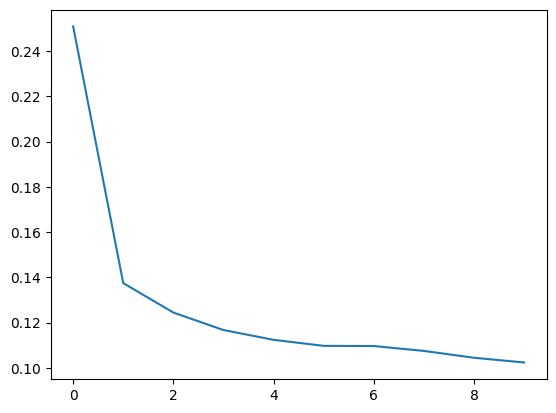

In [6]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

Primijetite kako se gubitak smanjuje kako epohe prolaze. Kada krivulja gubitaka postane tako horizontalna, to znači da je model naučio sve što je mogao i ne bi bilo razloga za nastavak dodatnih epoha.

# Tvoj red #

Sada, [**koristi stochastic gradient descent**](Stochastic_Gradient_Descent_exercise_hr.ipynb) za treniranje tvoje mreže.